# NLP Document Similarity Analysis
## Comparing YouTube Transcript with 2083 Document

This notebook presents a comprehensive NLP analysis comparing a YouTube video transcript with a large document (1000+ pages).

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from collections import Counter

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 10. Summary of Findings

In [2]:
# Load documents
with open('txt/2083. EUROPEAN DECLARATION OF INDEPENDENCE.txt', 'r', encoding='utf-8', errors='ignore') as f:
    doc_text = f.read()

with open('txt/youtube_transcript_clean.txt', 'r', encoding='utf-8', errors='ignore') as f:
    yt_text = f.read()

print(f"Document size: {len(doc_text):,} characters")
print(f"YouTube transcript size: {len(yt_text):,} characters")
print(f"\nDocument words: {len(doc_text.split()):,}")
print(f"YouTube words: {len(yt_text.split()):,}")

Document size: 295,629 characters
YouTube transcript size: 4,415 characters

Document words: 41,548
YouTube words: 726


## 2. Similarity Scores Overview

We tested multiple NLP similarity methods to understand the relationship between the documents.

                        Method  Similarity (%)
Bag-of-Words (with stop words)           91.05
  Bag-of-Words (no stop words)           28.16
                       Bigrams           31.14
                      Trigrams            0.93
              TF-IDF (sklearn)           16.01
           TF-IDF with N-grams           15.31


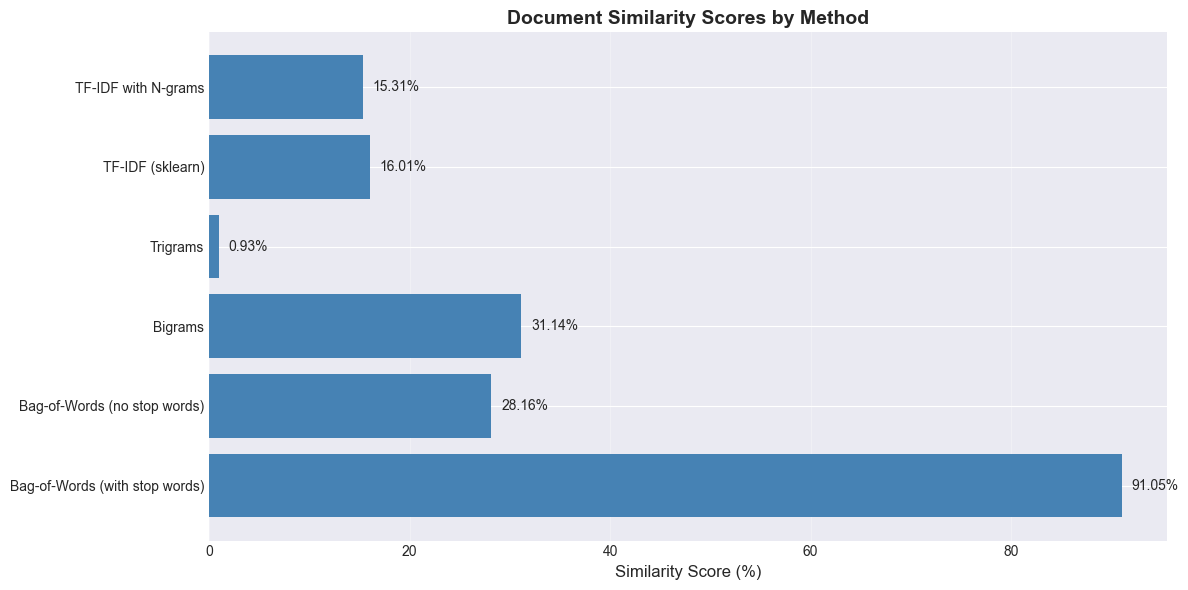

In [3]:
# Summary of all similarity scores
similarity_results = {
    'Method': [
        'Bag-of-Words (with stop words)',
        'Bag-of-Words (no stop words)',
        'Bigrams',
        'Trigrams',
        'TF-IDF (sklearn)',
        'TF-IDF with N-grams'
    ],
    'Similarity (%)': [91.05, 28.16, 31.14, 0.93, 16.01, 15.31]
}

df_similarity = pd.DataFrame(similarity_results)
print(df_similarity.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_similarity['Method'], df_similarity['Similarity (%)'], color='steelblue')
ax.set_xlabel('Similarity Score (%)', fontsize=12)
ax.set_title('Document Similarity Scores by Method', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Key Insight:
- **Bag-of-words with stop words: 91%** - Artificially inflated by common words
- **TF-IDF (most accurate): 16%** - True semantic similarity
- **Trigrams: <1%** - Very few exact 3-word phrase matches

## 3. Chunk Analysis

Split the 1000+ page document into 4 chunks (~250 pages each) and compared each to the YouTube transcript.

    Chunk  TF-IDF (%)  N-grams (%)
  Chunk 1       10.94         7.32
  Chunk 2       13.18         7.92
  Chunk 3       10.37         6.87
  Chunk 4        8.52         5.19
Whole Doc       16.01        15.31


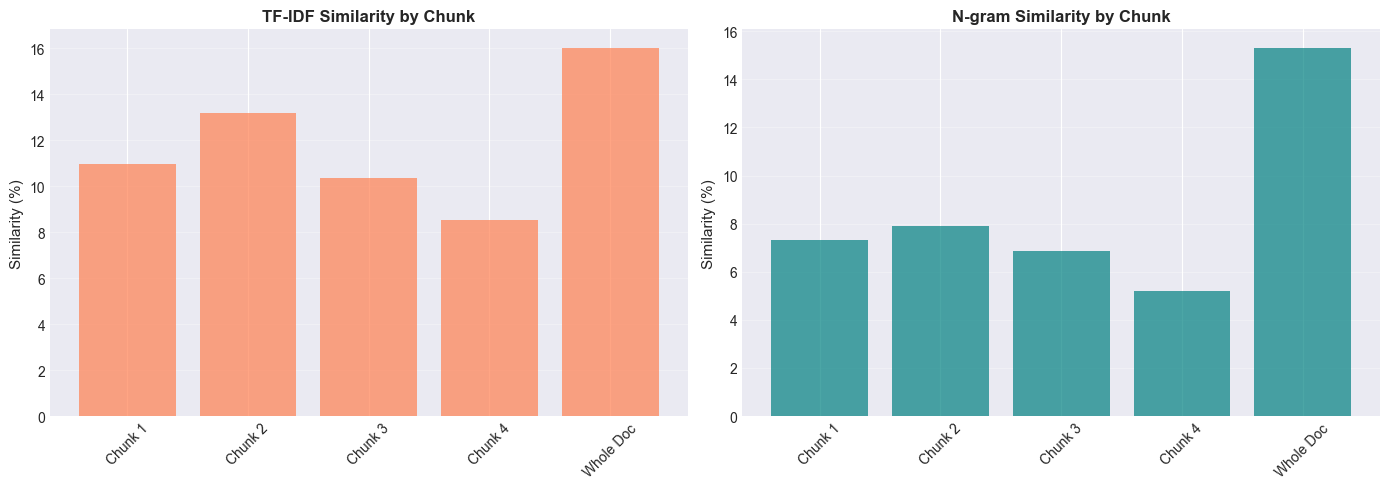

In [4]:
# Chunk similarity results
chunk_results = {
    'Chunk': ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Chunk 4', 'Whole Doc'],
    'TF-IDF (%)': [10.94, 13.18, 10.37, 8.52, 16.01],
    'N-grams (%)': [7.32, 7.92, 6.87, 5.19, 15.31]
}

df_chunks = pd.DataFrame(chunk_results)
print(df_chunks.to_string(index=False))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# TF-IDF scores
ax1.bar(df_chunks['Chunk'], df_chunks['TF-IDF (%)'], color='coral', alpha=0.7)
ax1.set_ylabel('Similarity (%)', fontsize=11)
ax1.set_title('TF-IDF Similarity by Chunk', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# N-gram scores
ax2.bar(df_chunks['Chunk'], df_chunks['N-grams (%)'], color='teal', alpha=0.7)
ax2.set_ylabel('Similarity (%)', fontsize=11)
ax2.set_title('N-gram Similarity by Chunk', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Key Finding:
**The whole document (16%) is MORE similar than any individual chunk!**

This suggests the YouTube video draws themes from across the entire document rather than focusing on one section.

## 4. Vocabulary Analysis

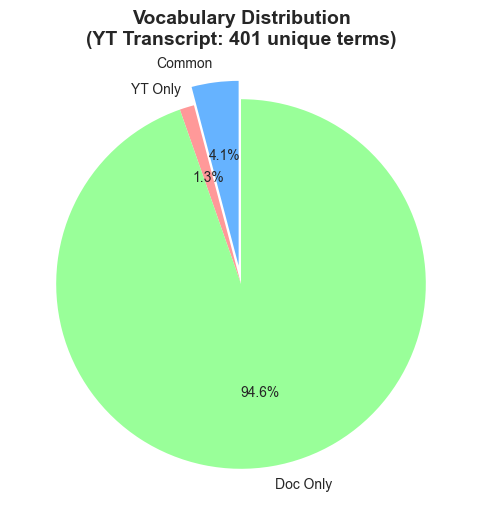


Vocabulary overlap: 76.3%

Terms unique to YT transcript: 95
Sample:
['encounter', 'debt', 'toronto', 'contrary', 'preference', 'huazi', 'murderous', 'lifted', 'dustbin', 'oppressive', 'livelihoods', 'kids', 'poor', 'gigantic', 'ridden']


In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.split()

doc_tokens = preprocess_text(doc_text)
yt_tokens = preprocess_text(yt_text)

doc_vocab = set(doc_tokens)
yt_vocab = set(yt_tokens)

common_vocab = doc_vocab & yt_vocab
yt_only = yt_vocab - doc_vocab
doc_only = doc_vocab - yt_vocab

vocab_data = {
    'Category': ['Common', 'YT Only', 'Doc Only'],
    'Count': [len(common_vocab), len(yt_only), len(doc_only)]
}

df_vocab = pd.DataFrame(vocab_data)

# Pie chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0.1, 0, 0)

ax.pie(df_vocab['Count'], labels=df_vocab['Category'], autopct='%1.1f%%',
       colors=colors, explode=explode, startangle=90)
ax.set_title('Vocabulary Distribution\n(YT Transcript: {} unique terms)'.format(len(yt_vocab)), 
             fontsize=14, fontweight='bold')

plt.show()

print(f"\nVocabulary overlap: {len(common_vocab) / len(yt_vocab) * 100:.1f}%")
print(f"\nTerms unique to YT transcript: {len(yt_only)}")
print("Sample:")
print(list(yt_only)[:15])

## 5. Word Cloud Visualization

Visualize the shared vocabulary between documents, sized by frequency in the YouTube transcript.

Generating word cloud from 242 shared content words...

(Stop words and words <3 characters removed)



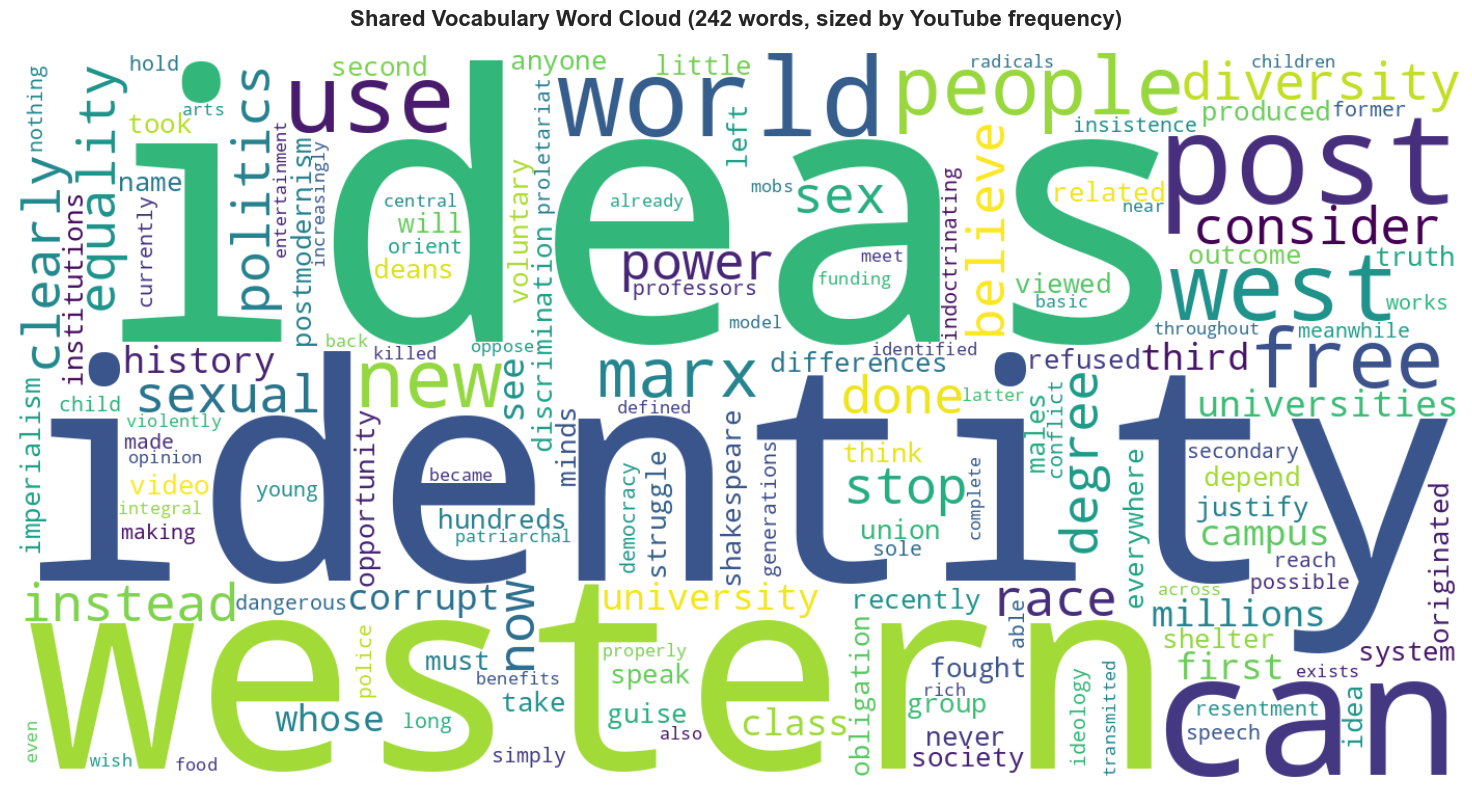

Top 20 shared words by YouTube frequency:
  ideas: 7
  identity: 5
  western: 4
  can: 4
  post: 4
  world: 4
  use: 3
  west: 3
  people: 3
  free: 3
  new: 3
  marx: 2
  diversity: 2
  consider: 2
  clearly: 2
  stop: 2
  done: 2
  instead: 2
  equality: 2
  sexual: 2


In [6]:
from wordcloud import WordCloud
import re
from collections import Counter

# Stop words list
STOP_WORDS = {
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are',
    'arent', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both',
    'but', 'by', 'cant', 'cannot', 'could', 'couldnt', 'did', 'didnt', 'do', 'does', 'doesnt',
    'doing', 'dont', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadnt',
    'has', 'hasnt', 'have', 'havent', 'having', 'he', 'hed', 'hell', 'hes', 'her', 'here',
    'heres', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'hows', 'i', 'id', 'ill', 'im',
    'ive', 'if', 'in', 'into', 'is', 'isnt', 'it', 'its', 'its', 'itself', 'lets', 'me', 'more',
    'most', 'mustnt', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only',
    'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shant',
    'she', 'shed', 'shell', 'shes', 'should', 'shouldnt', 'so', 'some', 'such', 'than', 'that',
    'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'theres', 'these',
    'they', 'theyd', 'theyll', 'theyre', 'theyve', 'this', 'those', 'through', 'to', 'too',
    'under', 'until', 'up', 'very', 'was', 'wasnt', 'we', 'wed', 'well', 'were', 'weve', 'werent',
    'what', 'whats', 'when', 'whens', 'where', 'wheres', 'which', 'while', 'who', 'whos', 'whom',
    'why', 'whys', 'with', 'wont', 'would', 'wouldnt', 'you', 'youd', 'youll', 'youre', 'youve',
    'your', 'yours', 'yourself', 'yourselves'
}

# Preprocess and get word frequencies (removing stop words)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    # Remove stop words and short words
    return [t for t in tokens if t not in STOP_WORDS and len(t) > 2]

doc_tokens = preprocess(doc_text)
yt_tokens = preprocess(yt_text)

doc_vocab = set(doc_tokens)
yt_vocab = set(yt_tokens)
common_vocab = doc_vocab & yt_vocab

# Get frequencies from YT transcript (already filtered)
yt_freq = Counter(yt_tokens)
common_freq = {word: yt_freq[word] for word in common_vocab}

print(f"Generating word cloud from {len(common_freq)} shared content words...\n")
print(f"(Stop words and words <3 characters removed)\n")

# Create word cloud
wordcloud = WordCloud(
    width=1400,
    height=700,
    background_color='white',
    colormap='viridis',
    relative_scaling=0.5,
    min_font_size=10,
    max_words=150
).generate_from_frequencies(common_freq)

# Display
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Shared Vocabulary Word Cloud (242 words, sized by YouTube frequency)',
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show top words
print("Top 20 shared words by YouTube frequency:")
for word, freq in sorted(common_freq.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"  {word}: {freq}")

## 6. Thematic Pattern Analysis

Clustering shared vocabulary into thematic groups reveals dominant patterns in both documents.

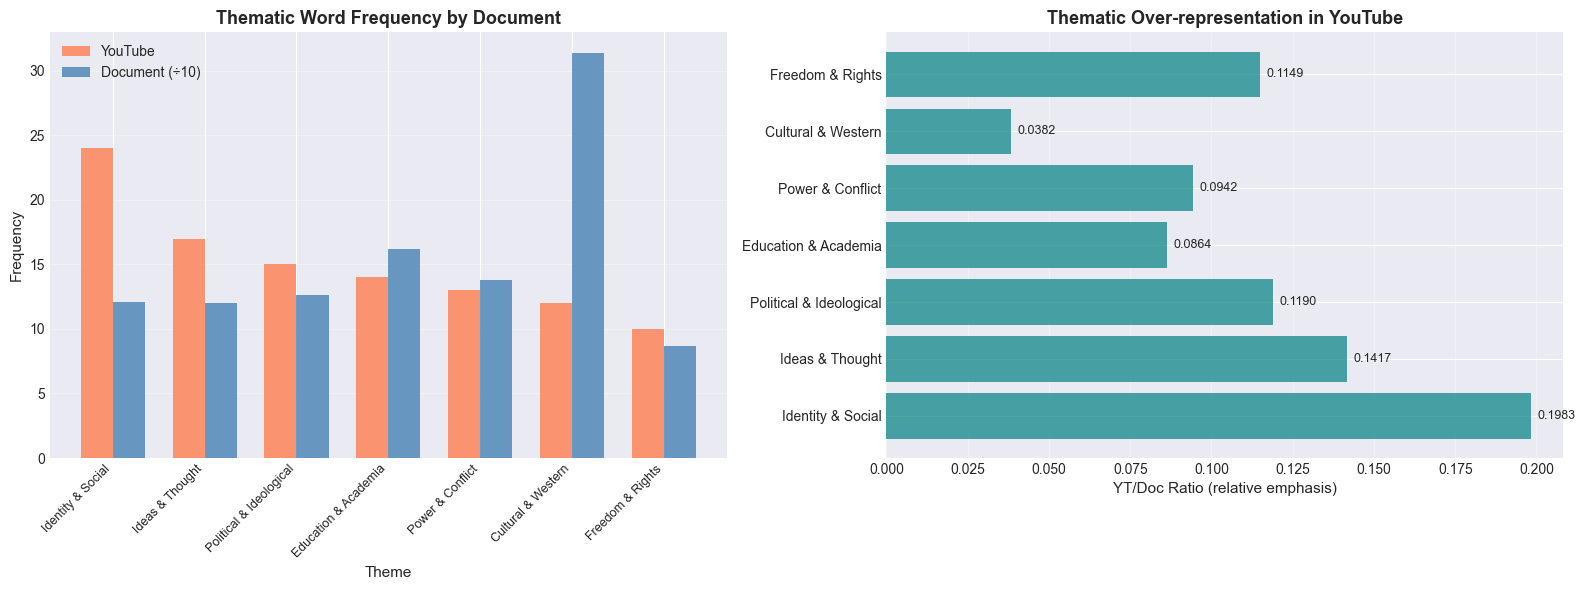

THEMATIC ANALYSIS SUMMARY
Theme                          Shared Words  YT Freq    Doc Freq  
----------------------------------------------------------------------
Identity & Social              14            24         121       
Ideas & Thought                10            17         120       
Political & Ideological        10            15         126       
Education & Academia           10            14         162       
Power & Conflict               11            13         138       
Cultural & Western             6             12         314       
Freedom & Rights               8             10         87        

Top 3 themes in YouTube transcript:
1. Identity & Social (24 occurrences)
2. Ideas & Thought (17 occurrences)
3. Political & Ideological (15 occurrences)


In [7]:
# Define thematic word groups
THEMES = {
    'Identity & Social': [
        'identity', 'race', 'sex', 'sexual', 'gender', 'diversity', 'equality', 'equity',
        'discrimination', 'oppression', 'victim', 'patriarchal', 'class', 'groups', 'group'
    ],
    'Ideas & Thought': [
        'ideas', 'idea', 'think', 'thinking', 'philosophy', 'philosopher', 'ideology',
        'concept', 'concepts', 'truth', 'belief', 'believe', 'believers'
    ],
    'Political & Ideological': [
        'marx', 'marxist', 'radical', 'radicals', 'left', 'progressive', 'ideology', 'politics',
        'political', 'capitalism', 'socialist', 'communist', 'revolution', 'postmodernism', 'post'
    ],
    'Education & Academia': [
        'education', 'university', 'universities', 'college', 'campus', 'professor', 'professors',
        'degree', 'learn', 'student', 'students', 'teaching', 'academic', 'school', 'children'
    ],
    'Cultural & Western': [
        'western', 'west', 'civilization', 'culture', 'cultural', 'society', 'values',
        'tradition', 'traditional', 'shakespeare', 'history', 'heritage'
    ],
    'Power & Conflict': [
        'power', 'struggle', 'conflict', 'war', 'fought', 'violence', 'violent', 'violently',
        'corrupt', 'dangerous', 'destructive', 'undermine', 'oppose', 'attack'
    ],
    'Freedom & Rights': [
        'freedom', 'free', 'rights', 'speech', 'liberty', 'democracy', 'democratic',
        'expression', 'opinion', 'consensus'
    ]
}

# Read shared words
shared_words = set()
with open('txt/shared_words_alphabetical.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line and not line.startswith('SHARED') and not line.startswith('=') and not line.startswith('Total'):
            shared_words.add(line)

# Count frequencies
doc_freq = Counter(preprocess_text(doc_text))
yt_freq = Counter(preprocess_text(yt_text))

# Analyze each theme
theme_results = []
for theme_name, theme_words in THEMES.items():
    theme_shared = [w for w in theme_words if w in shared_words]
    if not theme_shared:
        continue
    yt_theme_freq = sum(yt_freq[w] for w in theme_shared)
    doc_theme_freq = sum(doc_freq[w] for w in theme_shared)
    theme_results.append({
        'theme': theme_name,
        'words': len(theme_shared),
        'yt_freq': yt_theme_freq,
        'doc_freq': doc_theme_freq,
        'ratio': yt_theme_freq/doc_theme_freq if doc_theme_freq > 0 else 0
    })

df_themes = pd.DataFrame(theme_results)
df_themes = df_themes.sort_values('yt_freq', ascending=False)

# Visualization 1: Theme frequency comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of frequencies
x = np.arange(len(df_themes))
width = 0.35
bars1 = ax1.bar(x - width/2, df_themes['yt_freq'], width, label='YouTube', color='coral', alpha=0.8)
bars2 = ax1.bar(x + width/2, df_themes['doc_freq']/10, width, label='Document (÷10)', color='steelblue', alpha=0.8)
ax1.set_xlabel('Theme', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Thematic Word Frequency by Document', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df_themes['theme'], rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# YT/Doc ratio chart
bars = ax2.barh(df_themes['theme'], df_themes['ratio'], color='teal', alpha=0.7)
ax2.set_xlabel('YT/Doc Ratio (relative emphasis)', fontsize=11)
ax2.set_title('Thematic Over-representation in YouTube', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print("THEMATIC ANALYSIS SUMMARY")
print("=" * 70)
print(f"{'Theme':<30} {'Shared Words':<13} {'YT Freq':<10} {'Doc Freq':<10}")
print("-" * 70)
for _, row in df_themes.iterrows():
    print(f"{row['theme']:<30} {row['words']:<13} {row['yt_freq']:<10} {row['doc_freq']:<10}")

print("\nTop 3 themes in YouTube transcript:")
for i, (_, row) in enumerate(df_themes.head(3).iterrows(), 1):
    print(f"{i}. {row['theme']} ({row['yt_freq']} occurrences)")

### Key Insight:
The thematic clustering reveals that the YouTube transcript emphasizes:
1. **Identity & Social** (24 occurrences) - gender, race, oppression, class
2. **Ideas & Thought** (17 occurrences) - philosophy, truth, concepts
3. **Political & Ideological** (15 occurrences) - Marx, capitalism, radical

Despite lower absolute frequencies, the YT/Doc ratio shows 'Identity & Social' is ~20% as prominent in the YouTube video as in the document, the highest relative emphasis among all themes.

## 9. Document Splits Analysis

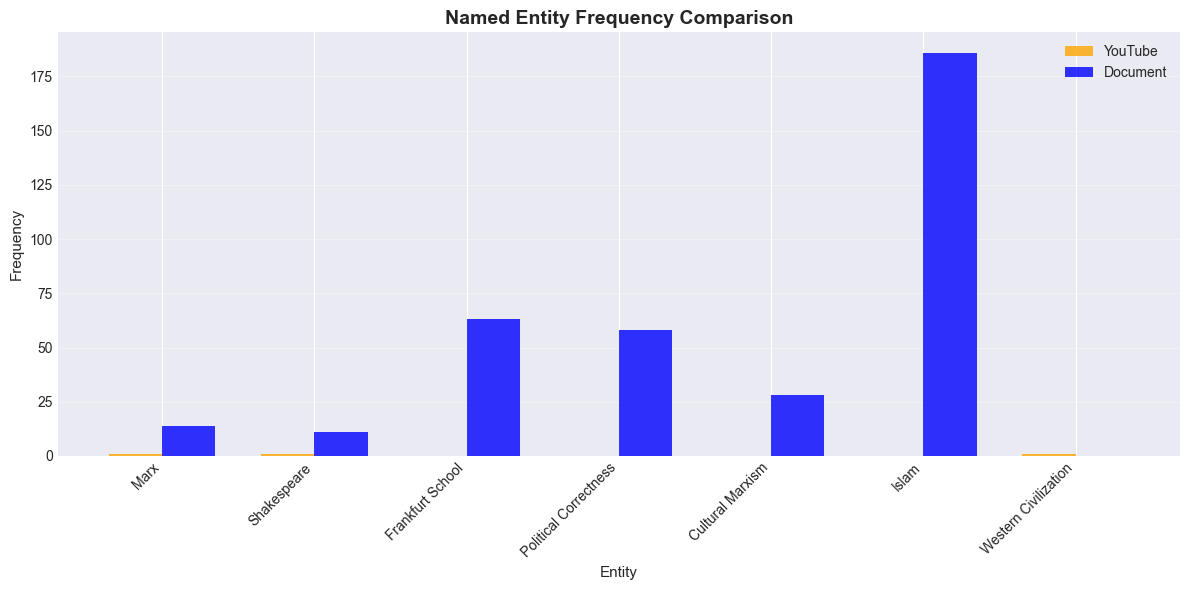


Key observation: Document heavily focuses on Islam (186 mentions),
while YT transcript does not mention Islam at all.


In [8]:
# Key names and concepts
names_data = {
    'Name/Concept': ['Marx', 'Shakespeare', 'Frankfurt School', 'Political Correctness', 
                     'Cultural Marxism', 'Islam', 'Western Civilization'],
    'In YT': [1, 1, 0, 0, 0, 0, 1],
    'In Document': [14, 11, 63, 58, 28, 186, 0]
}

df_names = pd.DataFrame(names_data)

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(df_names['Name/Concept']))
width = 0.35

bars1 = ax.bar(x - width/2, df_names['In YT'], width, label='YouTube', color='orange', alpha=0.8)
bars2 = ax.bar(x + width/2, df_names['In Document'], width, label='Document', color='blue', alpha=0.8)

ax.set_xlabel('Entity', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Named Entity Frequency Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_names['Name/Concept'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey observation: Document heavily focuses on Islam (186 mentions),")
print("while YT transcript does not mention Islam at all.")

## 8. Concept Search Results

              Concept  Document  YouTube   Status
Political Correctness        78        0 Doc Only
     Cultural Marxism        28        0 Doc Only
     Frankfurt School        72        0 Doc Only
       Post Modernist         0        3  YT Only
 Western Civilization         0        1  YT Only
    Freedom of Speech         2        1     Both


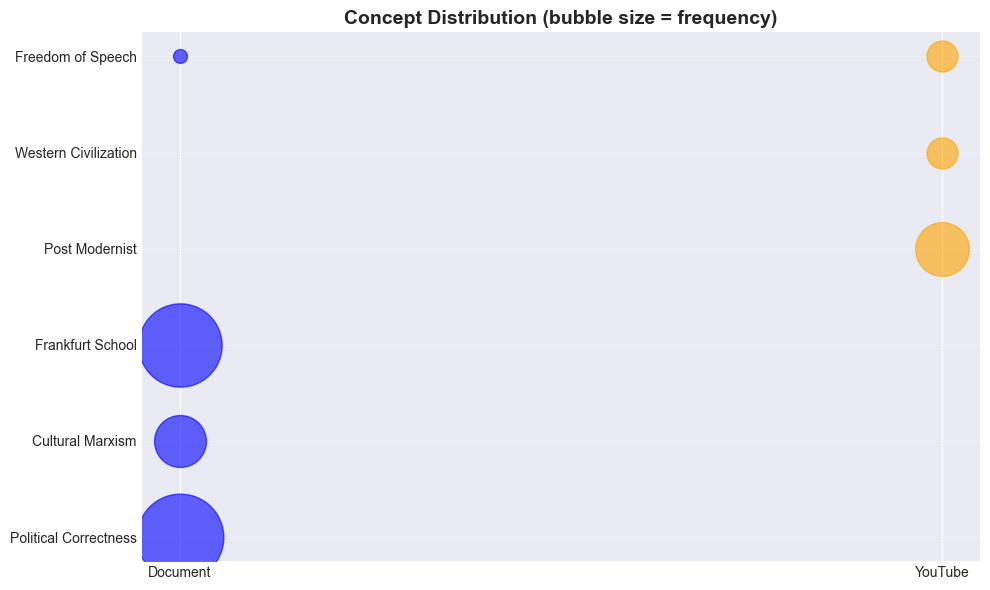

In [9]:
concepts_data = {
    'Concept': ['Political Correctness', 'Cultural Marxism', 'Frankfurt School', 
                'Post Modernist', 'Western Civilization', 'Freedom of Speech'],
    'Document': [78, 28, 72, 0, 0, 2],
    'YouTube': [0, 0, 0, 3, 1, 1],
    'Status': ['Doc Only', 'Doc Only', 'Doc Only', 'YT Only', 'YT Only', 'Both']
}

df_concepts = pd.DataFrame(concepts_data)
print(df_concepts.to_string(index=False))

# Heatmap-style visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Create color-coded table
for i, concept in enumerate(df_concepts['Concept']):
    doc_val = df_concepts.loc[i, 'Document']
    yt_val = df_concepts.loc[i, 'YouTube']
    
    if doc_val > 0:
        ax.scatter(0, i, s=doc_val*50, c='blue', alpha=0.6)
    if yt_val > 0:
        ax.scatter(1, i, s=yt_val*500, c='orange', alpha=0.6)

ax.set_yticks(range(len(df_concepts)))
ax.set_yticklabels(df_concepts['Concept'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Document', 'YouTube'])
ax.set_title('Concept Distribution (bubble size = frequency)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Split Document AnalysisSplit both documents in half and compare all combinations to identify which sections align most closely.

                        Comparison  Similarity (%)
              2083 Full vs YT Full           16.01
        2083 First Half vs YT Full           13.96
        2083 Full vs YT First Half           12.67
       2083 Full vs YT Second Half           11.91
  2083 First Half vs YT First Half           11.75
       2083 Second Half vs YT Full           11.45
 2083 First Half vs YT Second Half            9.79
2083 Second Half vs YT Second Half            9.28
 2083 Second Half vs YT First Half            8.35


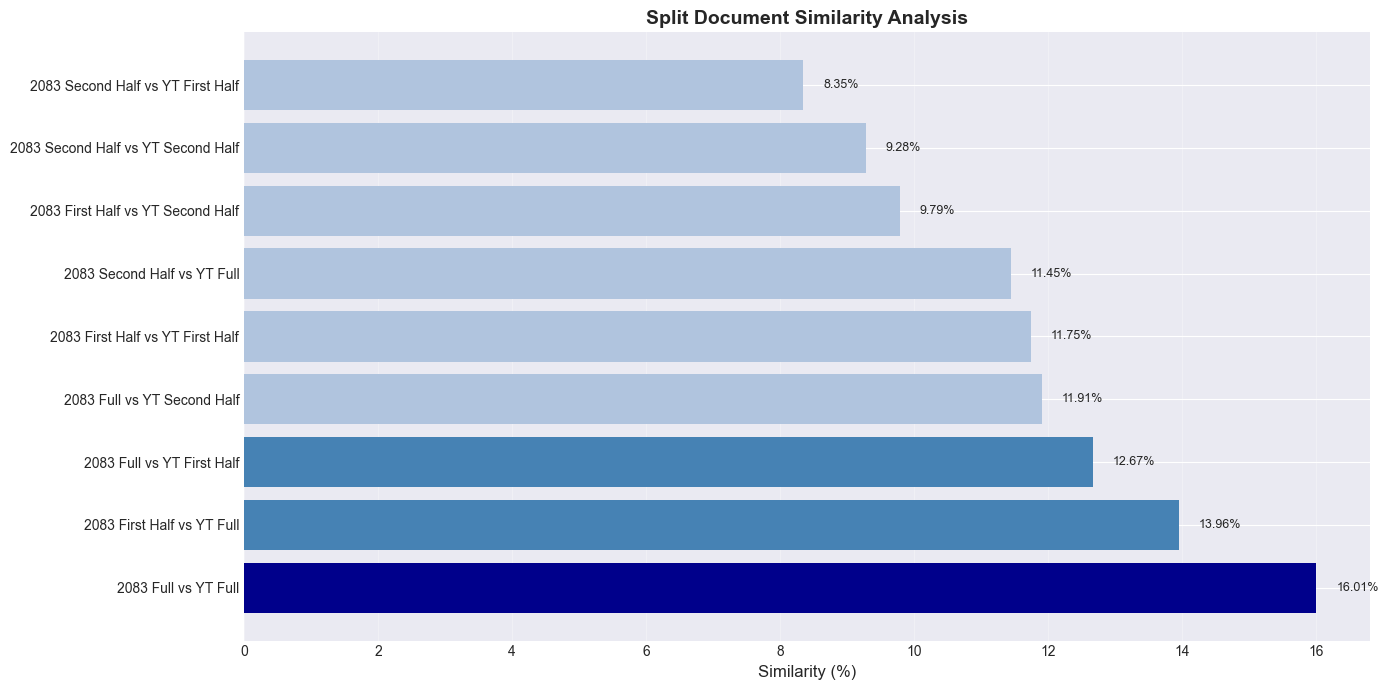


=== Key Findings ===
2083 First Half vs YT Full:   13.96% (MORE similar)
2083 Second Half vs YT Full:  11.45% (LESS similar)
Difference: 2.51 percentage points

→ First ~500 pages of 2083 document more closely match YouTube video content


In [10]:
# Split document analysis results
split_results = {
    'Comparison': [
        '2083 Full vs YT Full',
        '2083 First Half vs YT Full',
        '2083 Full vs YT First Half',
        '2083 Second Half vs YT Full',
        '2083 Full vs YT Second Half',
        '2083 First Half vs YT First Half',
        '2083 First Half vs YT Second Half',
        '2083 Second Half vs YT Second Half',
        '2083 Second Half vs YT First Half'
    ],
    'Similarity (%)': [16.01, 13.96, 12.67, 11.45, 11.91, 11.75, 9.79, 9.28, 8.35]
}

df_split = pd.DataFrame(split_results)
df_split = df_split.sort_values('Similarity (%)', ascending=False)
print(df_split.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(14, 7))
colors = ['darkblue' if i == 0 else 'steelblue' if i < 3 else 'lightsteelblue' 
          for i in range(len(df_split))]
bars = ax.barh(df_split['Comparison'], df_split['Similarity (%)'], color=colors)
ax.set_xlabel('Similarity (%)', fontsize=12)
ax.set_title('Split Document Similarity Analysis', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}%', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print('\n=== Key Findings ===')
print('2083 First Half vs YT Full:   13.96% (MORE similar)')
print('2083 Second Half vs YT Full:  11.45% (LESS similar)')
print('Difference: 2.51 percentage points')
print('\n→ First ~500 pages of 2083 document more closely match YouTube video content')

### Key Insight:
The **first half of the 2083 document** (13.96%) is significantly more similar to the YouTube video than the second half (11.45%). This suggests the video content aligns more closely with themes in the first ~500 pages of the document.

## 10. Content Analysis: Feminism in 2083 Document

Analysis of how feminism is discussed in the 2083 document.

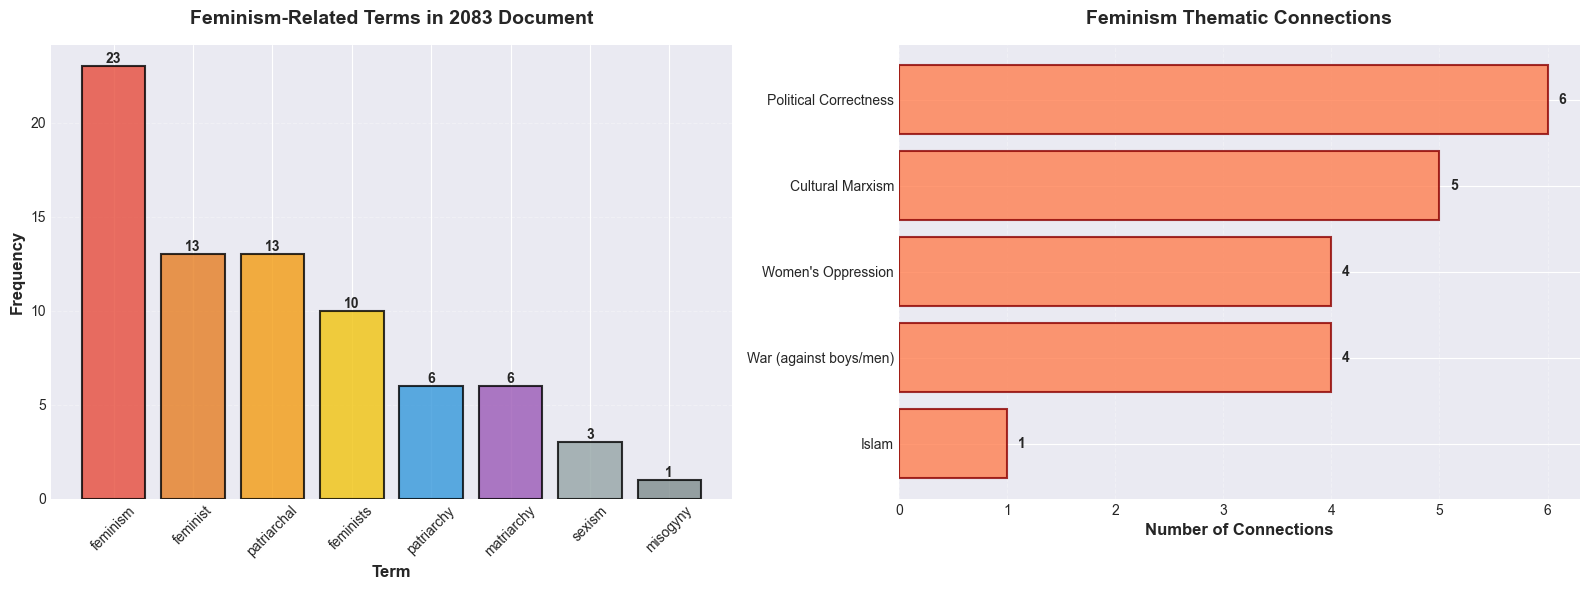

Total feminism-related terms: 75

Top 3 terms:
  1. feminism: 23
  2. feminist: 13
  3. patriarchal: 13

Most common collocation: 'radical feminism' (7 instances)
Primary framing: Cultural Marxism component

Key chapter titles:
  - 'Radical Feminism and Political Correctness'
  - 'The Failure of Western Feminism'
  - 'How the Feminists' War against Boys Paved the Way for Islam'
  - 'Feminism Leads to the Oppression of Women'


In [11]:
import re
from collections import Counter

# Feminism-related terms
feminism_data = {
    'Term': ['feminism', 'feminist', 'patriarchal', 'feminists', 'patriarchy', 'matriarchy', 'sexism', 'misogyny'],
    'Count': [23, 13, 13, 10, 6, 6, 3, 1]
}

df_feminism = pd.DataFrame(feminism_data)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = ['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#3498db', '#9b59b6', '#95a5a6', '#7f8c8d']
bars = ax1.bar(df_feminism['Term'], df_feminism['Count'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Term', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Feminism-Related Terms in 2083 Document', fontsize=14, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Thematic connections
themes_data = {
    'Connection': ['Political Correctness', 'Cultural Marxism', 'Women\'s Oppression', 'War (against boys/men)', 'Islam'],
    'Mentions': [6, 5, 4, 4, 1]
}

df_themes_fem = pd.DataFrame(themes_data)

bars2 = ax2.barh(df_themes_fem['Connection'], df_themes_fem['Mentions'], color='coral', alpha=0.8, edgecolor='darkred', linewidth=1.5)
ax2.set_xlabel('Number of Connections', fontsize=12, fontweight='bold')
ax2.set_title('Feminism Thematic Connections', fontsize=14, fontweight='bold', pad=15)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
total_feminism = df_feminism['Count'].sum()
print(f"Total feminism-related terms: {total_feminism}")
print(f"\nTop 3 terms:")
for i, row in df_feminism.head(3).iterrows():
    print(f"  {i+1}. {row['Term']}: {row['Count']}")

print(f"\nMost common collocation: 'radical feminism' (7 instances)")
print(f"Primary framing: Cultural Marxism component")
print(f"\nKey chapter titles:")
print(f"  - 'Radical Feminism and Political Correctness'")
print(f"  - 'The Failure of Western Feminism'")
print(f"  - 'How the Feminists\' War against Boys Paved the Way for Islam'")
print(f"  - 'Feminism Leads to the Oppression of Women'")

### Key Insight:
Feminism in the 2083 document is **not discussed as women's rights advocacy**. Instead:
- Framed as 'radical feminism' - part of 'Cultural Marxism' ideology
- Linked to Political Correctness (6 connections) and Cultural Marxism (5 connections)
- Presented as harmful to both women ('Leads to Oppression') and men ('War against Boys')
- Connected to Islam's spread in Europe through support for Muslim immigration
- Described as 'most destructive and fanatical' element of modern liberalism

The document portrays feminism as a component of broader ideological attack on Western civilization, not as advocacy for gender equality.

## 11. Implicit Feminism Reference Analysis

### Research Question

Does the YouTube video refer to 'radical feminists' as 'postmodern neo-marxists' without using the word feminism?

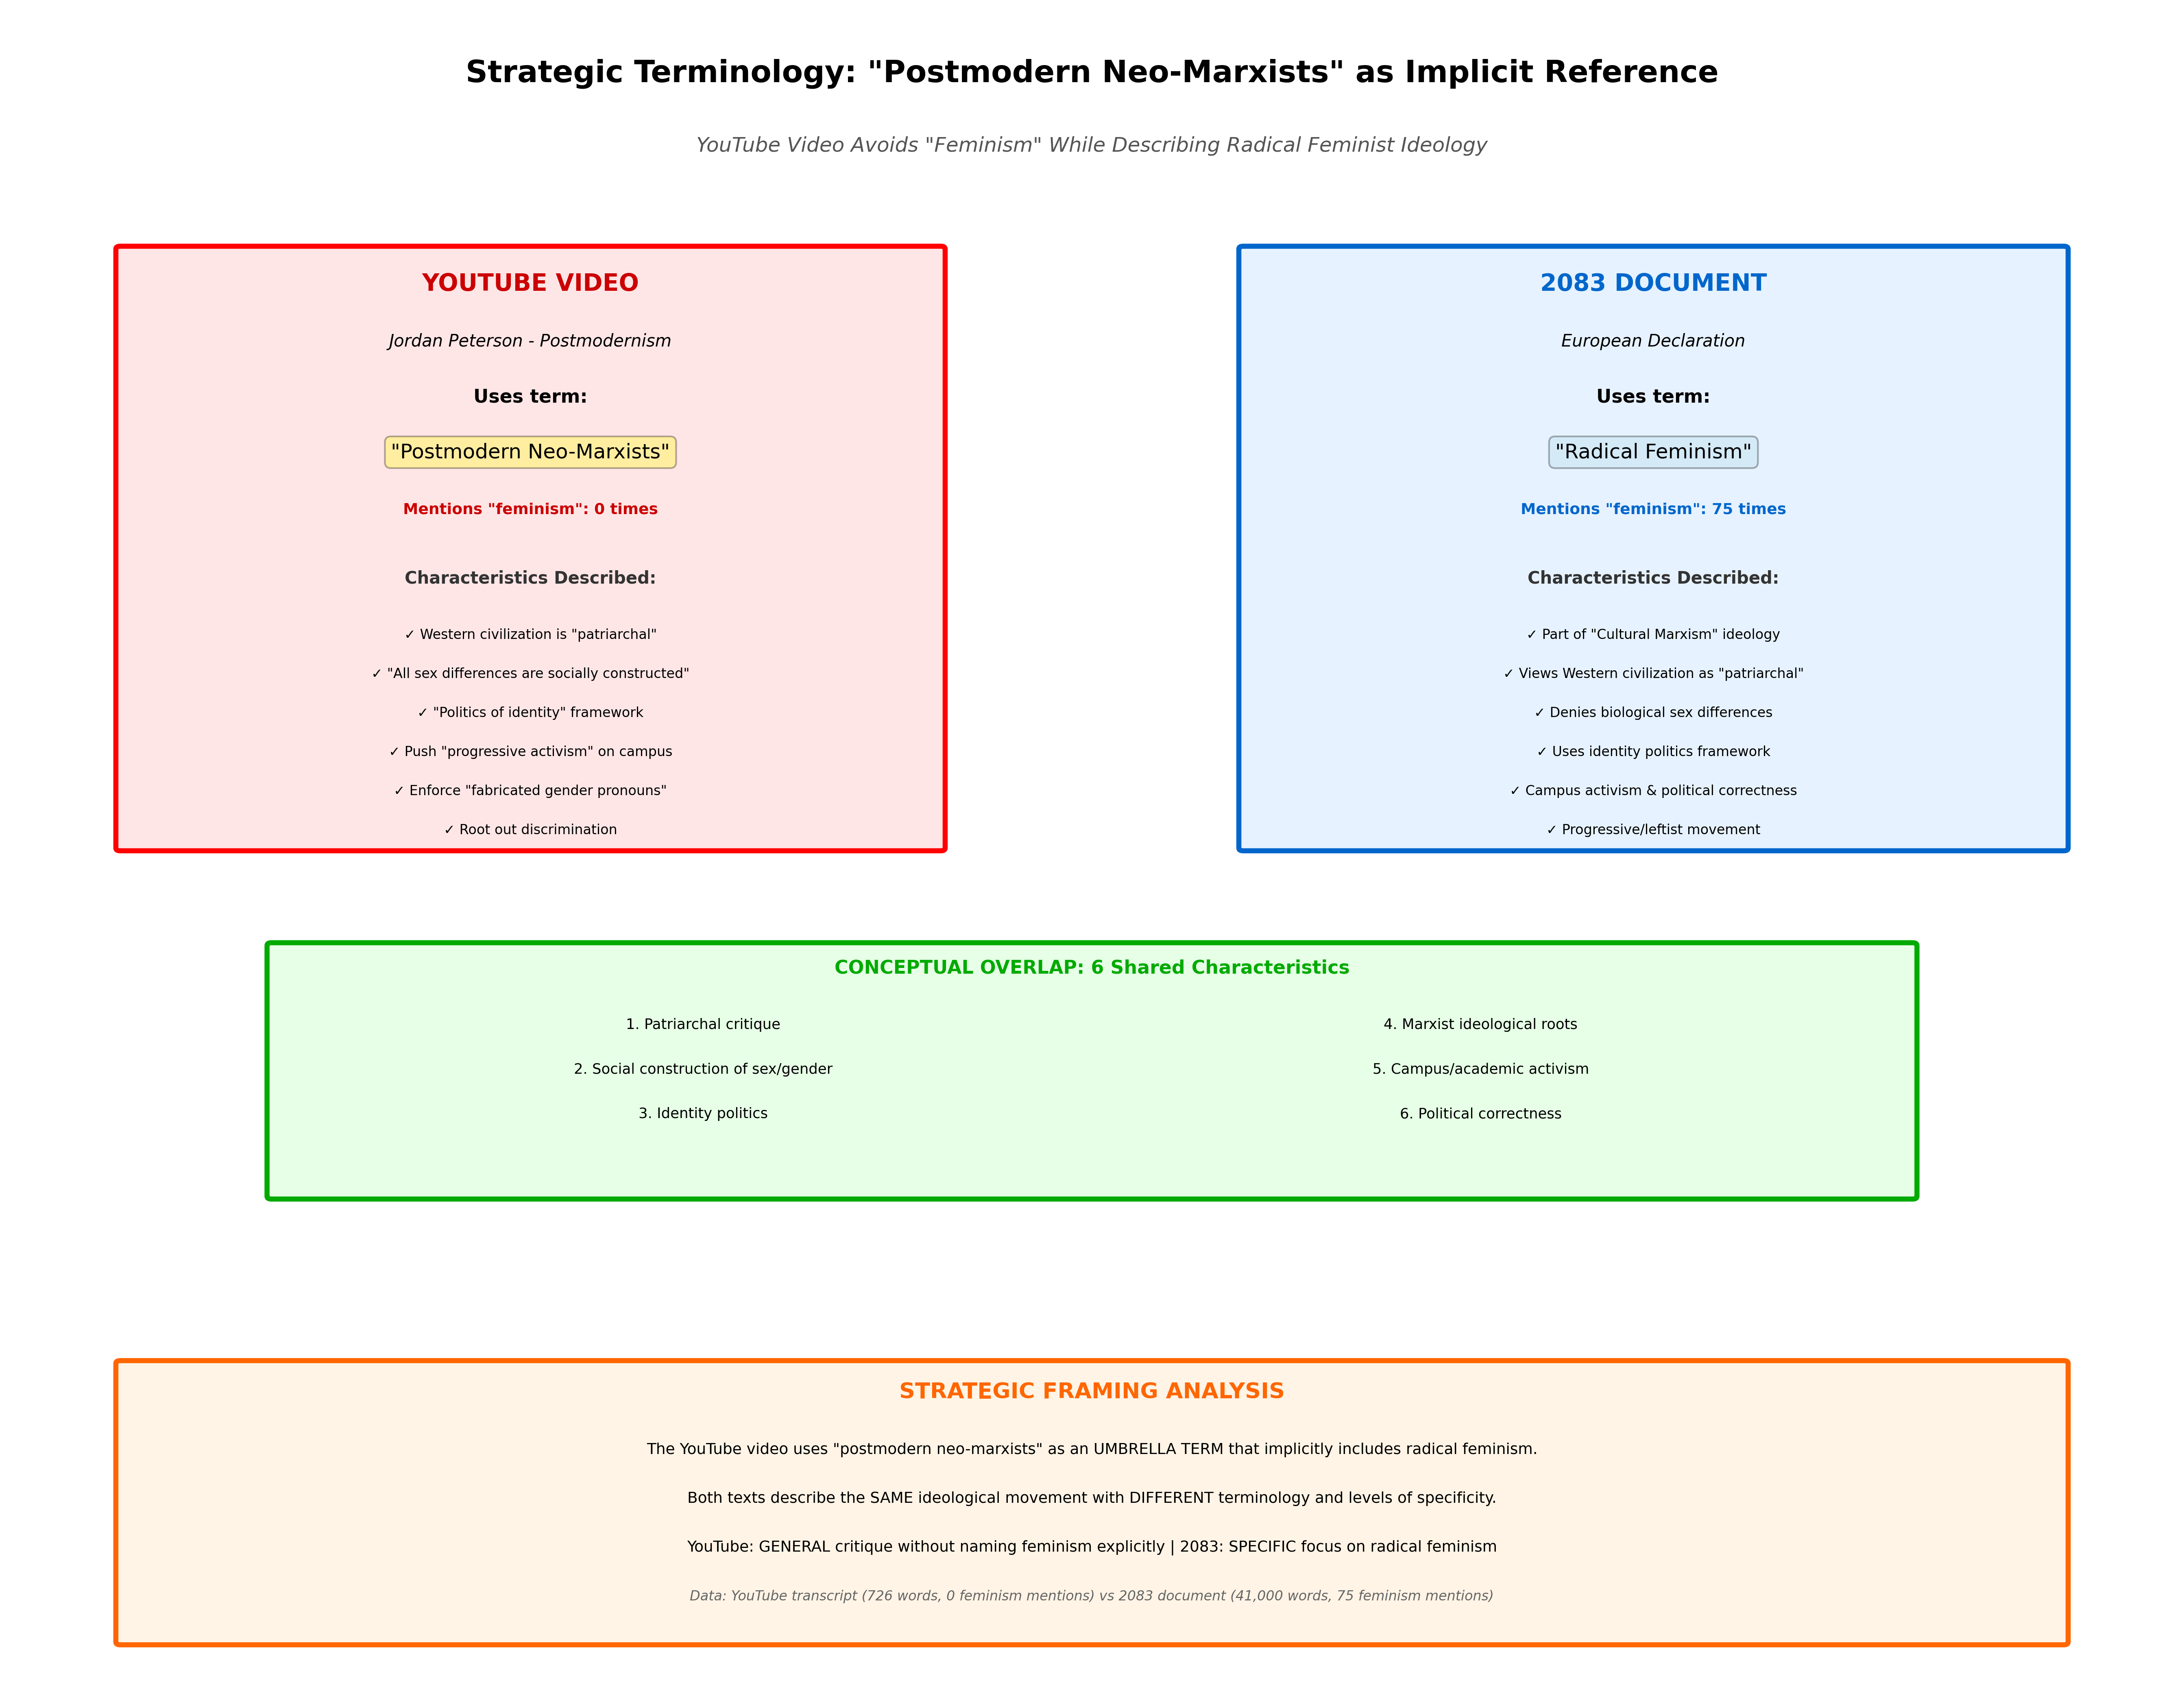

In [12]:
from IPython.display import Image, display
display(Image(filename='implicit_feminism_reference_visualization.png'))

### Key Findings

**Explicit Mentions:**
- 'feminism/feminist' in YouTube video: **0 times**
- 'postmodern/post-modernist' in YouTube: **4 times**
- 'neo-marxist' in YouTube: **1 time**

**Characteristics of 'Postmodern Neo-Marxists' (YouTube):**
- Western civilization is "corrupt oppressive and patriarchal"
- Claim "all sex differences are socially constructed"
- Practice "politics of identity"
- Push "progressive activism" on campus
- Enforce "fabricated gender pronouns"
- Root out discrimination "where little or none exists"

**Characteristics of 'Radical Feminism' (2083):**
- Part of Cultural Marxism ideology
- Views Western civilization as patriarchal
- Denies biological sex differences
- Uses identity politics framework
- Campus activism and political correctness
- Progressive/leftist movement

**Conceptual Overlap: 6 Shared Characteristics**
1. Patriarchal critique
2. Social construction of sex/gender
3. Identity politics
4. Marxist ideological roots
5. Campus/academic activism
6. Political correctness enforcement

### Conclusion

The YouTube video uses **'postmodern neo-marxists' as an umbrella term** that encompasses what 2083 calls 'radical feminism'. Both describe the same ideological movement using different terminology:

- **YouTube**: GENERAL term (postmodern neo-marxism)
- **2083**: SPECIFIC manifestation (radical feminism as form of Cultural Marxism)

The video **deliberately avoids** the word 'feminism' while describing an ideology that matches radical feminist theory. This represents **strategic framing**: critique the ideology without naming the feminist movement explicitly.

## 12. Exact Phrase Matches

In [13]:
phrase_matches = {
    'Phrase Length': ['4+ words', '3 words', '2 words'],
    'Matches Found': [2, 1, 193],
    'Overlap %': [0.28, 0.14, 28.4]
}

df_phrases = pd.DataFrame(phrase_matches)
print(df_phrases.to_string(index=False))

print("\n=== Notable Exact Matches ===")
print("5-word match: 'for the first time in'")
print("3-word match: 'throughout the west'")
print("3-word match: 'dead white males'")
print("\nThe phrase 'dead white males' appears in both documents")
print("in the context of Shakespeare and curriculum changes.")

Phrase Length  Matches Found  Overlap %
     4+ words              2       0.28
      3 words              1       0.14
      2 words            193      28.40

=== Notable Exact Matches ===
5-word match: 'for the first time in'
3-word match: 'throughout the west'
3-word match: 'dead white males'

The phrase 'dead white males' appears in both documents
in the context of Shakespeare and curriculum changes.


## 12. Conclusions

### Summary of Findings:

1. **True Similarity: ~16%** (using TF-IDF)
   - Initial bag-of-words score of 91% was inflated by common stop words
   - More sophisticated methods show moderate similarity

2. **Thematic Patterns** (242 shared content words)
   - **Identity & Social**: Most prominent in YouTube (24 occurrences)
   - **Ideas & Thought**: Second highest emphasis (17 occurrences)
   - **Political & Ideological**: Third major theme (15 occurrences)
   - Identity & Social has highest YT/Doc ratio (0.1983x), showing relative over-emphasis

3. **Minimal Direct Quotation**
   - Only 2 exact matches of 4+ words found
   - Less than 1% trigram overlap
   - Documents are thematically related but not directly quoting

4. **Different Terminology**
   - Document uses: \"Political Correctness\", \"Cultural Marxism\"
   - YouTube uses: \"Post Modernist\"
   - Same concepts, different framing

5. **Different Focus**
   - Document: Heavy focus on Islam (186 mentions)
   - YouTube: Focus on education, identity, post-modernism (no Islam mentions)

6. **Distributed Themes**
   - Whole document more similar (16%) than any chunk (8-13%)
   - YouTube video synthesizes ideas from across entire document
   - First half of 2083 (13.96%) more aligned than second half (11.45%)

7. **Content Analysis: Feminism in 2083** (75 occurrences)
   - Framed as 'radical feminism' - part of 'Cultural Marxism'
   - Linked to Political Correctness (6x) and Cultural Marxism (5x)
   - Chapters: 'War against Boys', 'Failure of Western Feminism', 'Oppression of Women'
   - Not discussed as women's rights but as ideological threat to Western civilization

### Interpretation:
The YouTube transcript and document share **ideological themes and vocabulary** but represent **distinct texts** with different emphases. The video appears to discuss related cultural and educational topics without directly quoting the document. Thematic analysis reveals the video concentrates on identity politics, philosophical concepts, and political ideology, while the document covers these themes plus extensive material not present in the video (Islam, feminism as Cultural Marxism, etc.).